In [ ]:
#| hide
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# OO编程 VS 函数式编程

我们可以直接使用plt的直接调用系统函数快速生成图，也可是使用面向对象的方式，一步一步的生成我们需要的，生成图元对象，设置属性，加入到容器中。以下是两种方式编程的一个对比：

<matplotlib.legend.Legend>

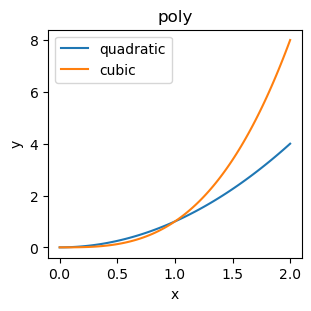

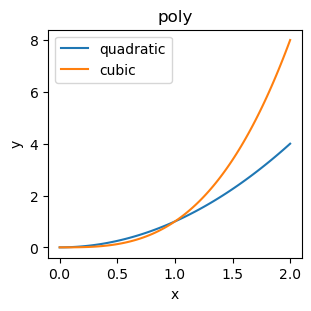

In [ ]:
x = np.linspace(0, 2, 100)  # Sample data.

##OO式编程
fig,ax=plt.subplots(figsize=(3,3),layout='constrained')
ax.plot(x,x*x,label='quadratic')
ax.plot(x,x*x*x,label='cubic')
ax.set_title('poly')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()


##函数式编程
plt.figure(figsize=(3,3),layout='constrained')
plt.plot(x,x*x,label='quadratic')
plt.plot(x,x*x*x,label='cubic')
plt.title('poly')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# 全局设置

## %matplotlib inline

此魔法命令的解释：
- %matplotlib 是ipython的命令，是为了连上ipython GUI event loop，用于显示图片

- inline 是在jupyter notebook中画图使用的命令，而且可以保证 plot之后的，命令不会影响到 之前的plot代码的执行。也就是说，plot是以command cell为单位的，不同的cell互不影响。


## 默认matplotlib的风格：[rcParam](https://matplotlib.org/stable/api/matplotlib_configuration_api.html#matplotlib.rcParams)

mpl.rcParams的参数已key,value的形式定义，当绘图的时候，所有默认的参数都会从rcParams获取。`mpl.rcParams.keys()`方法用于查看所有的可设置的参数。

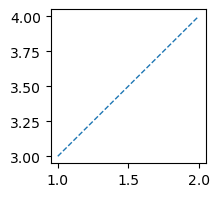

In [ ]:
mpl.rcParams['lines.linewidth']=1
mpl.rcParams['lines.linestyle']='--'
mpl.rcParams['figure.figsize']=(2,2)
_=plt.plot([1,2],[3,4])

# Axes对象的常用方法

## scatter方法

scatter常用的属性：c,s,[marker](https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers)。


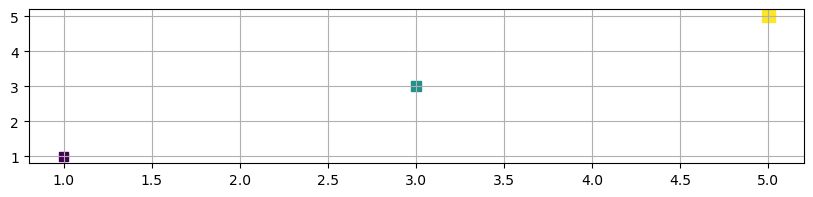

In [ ]:
data={
    'x':np.array([1,3,5]),
    'y':np.array([1,3,5]),
    'size':[40,50,80],
    'color':[30,60,90],
}
fig,ax=plt.subplots(figsize=(10, 2))
ax.scatter(data['x'],data['y'],s=data['size'],c=data['color'],marker=data['marker'])
ax.grid()

上面写法如果觉得很笨重，可以传递`data`这个属性，然后设置`函数的args`与`data`的key做对应。

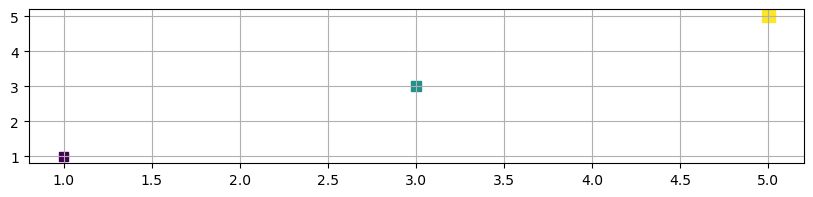

In [ ]:
fig,ax=plt.subplots(figsize=(10,2))
ax.scatter('x','y',c='color',s='size',data=data,marker='s')
ax.grid()

## grid方法

## set_title,set_label,legend方法

<matplotlib.legend.Legend>

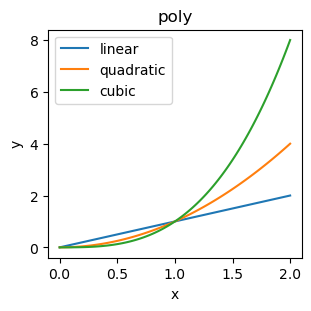

In [ ]:
x = np.linspace(0, 2, 100)  # Sample data.

fig,ax=plt.subplots(figsize=(3,3),layout='constrained')
ax.plot(x,x,label='linear')
ax.plot(x,x*x,label='quadratic')
ax.plot(x,x*x*x,label='cubic')
ax.set_title('poly')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()

## plot

常用属性：linestyle,color,linewidth,label

<matplotlib.legend.Legend>

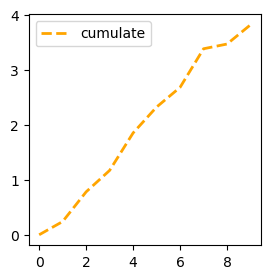

In [ ]:
data=np.random.rand(10)
X=np.arange(len(data))
Y=np.cumsum(data)

plt.figure(figsize=(3,3))
line_list=plt.plot(X,Y)
line_list[0].set_linestyle('--')
line_list[0].set_color('orange')
line_list[0].set_linewidth(2)
line_list[0].set_label('cumulate')
plt.legend()

## imshow

In [ ]:
from fastai.vision.all import *

<matplotlib.colorbar.Colorbar>

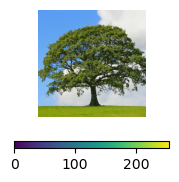

In [ ]:
img=Image.open('imgs/oak_tree.jpg')
axesImage=plt.imshow(img)
plt.axis('off')
plt.colorbar( axesImage,orientation='horizontal')

## hist

bins,density是这个函数的2个重要的属性。bins表示把samples区间划分成多少块。density=False,直方图每一块对应的value记录的是是落入此区间样本的数量，density=True会把直方图每一块记录对应的value会被做归一化处理，保证直方图下的整体面积是1.

返回值bins:是区块的刻度，vals区块是对应的值。注意到bins的长度比vals的长度大一。

vals.size=50,bins.size=51


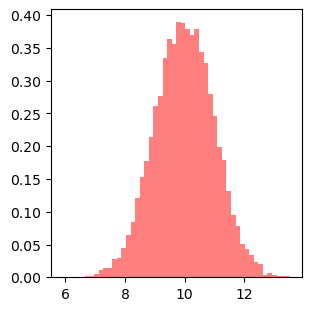

In [ ]:
mu,sigma=10,3
sample=mu+np.random.randn(10000)

fig,axes=plt.subplots(figsize=(3,3),layout='constrained')

vals,bins,hist_art=axes.hist(sample,bins=50,density=True,color='r',alpha=0.5)
print(f'vals.size={len(vals)},bins.size={len(bins)}')

## text方法

vals.size=50,bins.size=51


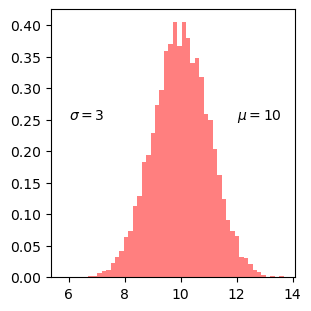

In [ ]:
mu,sigma=10,3
sample=mu+np.random.randn(10000)

fig,axes=plt.subplots(figsize=(3,3),layout='constrained')

axes.text(6,0.25,'$\sigma=3$')
axes.text(12,0.25,'$\mu=10$')
vals,bins,hist_art=axes.hist(sample,bins=50,density=True,color='r',alpha=0.5)
print(f'vals.size={len(vals)},bins.size={len(bins)}')

## annotate方法

(-2.0, 2.0)

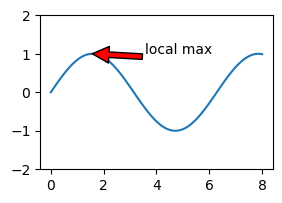

In [ ]:
t=np.linspace(0,8,100)
sint=np.sin(t)

plt.figure(figsize=(3,2))
plt.plot(t,sint)
#arrowprops属性会决定箭头
plt.annotate('local max',(np.pi/2,1),(np.pi/2+2,1),arrowprops=dict(facecolor='red'))
plt.ylim(-2,2)

## semilogx,semilogy

当调用此方式时，对应的刻度也会发生变化，非常方便。

Text(0.5, 1.0, 'log scale X')

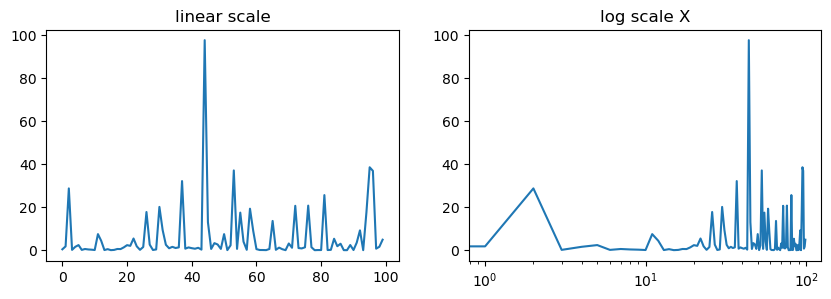

In [ ]:
power=np.random.randn(100)*3
XX=np.arange(len(power))
YY=2**power

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,3))
ax1.plot(XX,YY)
ax1.set_title('linear scale')
ax2.semilogx()
# ax2.semilogy()
ax2.plot(XX,YY)
ax2.set_title('log scale X')

## set_xticks，set_yticks

重要的属性：ticks，labels。ticks是刻度的位置，labels如果设置的话会显示的时候会替代刻度的数值。

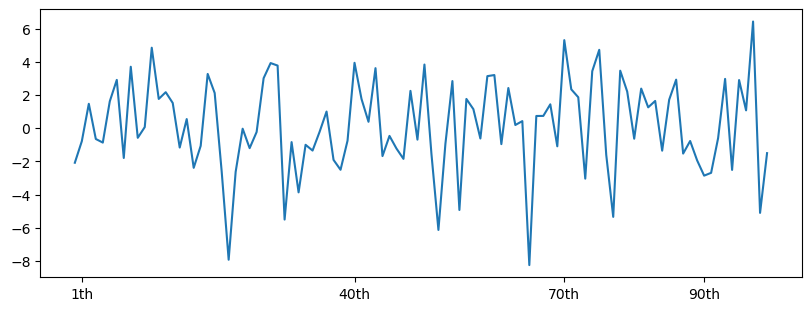

In [ ]:
data=np.random.randn(100)*3
X=np.arange(len(data))

fig,ax=plt.subplots(figsize=(8,3),layout='constrained')

ax.plot(X,data)
# plt.xticks,plt.yticks
_=ax.set_xticks(ticks=[1,40,70,90],labels=['1th','40th','70th','90th']),


# Artist

- 基本类型：Line2D,Text,AxesImage,Rect
- 复合类型:Figuure,Axes,Subplot，Axis
  - Axes有很多helper方法，用于创建基本类型Artist,并且添加到复合类型中,比如plot,text，imshow
  - Axes默认有 XAxis,YAxis2个对象，Axis也是复合对象，可以进行设置刻度的显示
  - Subplot是特殊的Axes, 表示grid 布局的axes
  - fig.add_axes([left, bottom, width, height]),可以添加任意布局的 axes



## fig.add_axes

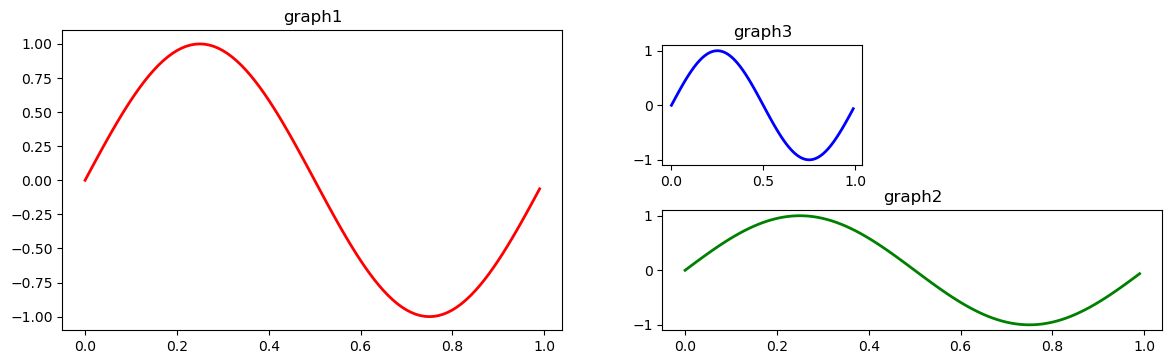

In [ ]:
fig=plt.figure(figsize=(10,3))
axes1=fig.add_axes([0,  0,0.5,1])
axes2=fig.add_axes([0.6,0,0.5,0.4])
axes3=fig.add_axes([0.6,0.55,0.2,0.4])

axes1.set_title('graph1')
axes2.set_title('graph2')
axes3.set_title('graph3')

t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2*np.pi*t)

line, = axes1.plot(t, s,'-', color='r', lw=2)
line, = axes2.plot(t, s,'-', color='g', lw=2)
line, = axes3.plot(t, s,'-', color='b', lw=2)

## [自定义创建对象的属性](https://matplotlib.org/stable/tutorials/intermediate/artists.html#customizing-your-objects)

- 每个对象都有set方法，set还有一些便捷的set_*方法`(如：obj.patch.set or obj.set)`。
- 可以使用`mpl.artist.getp(obj)`或者`plt.getp(obj)` 查看对象的全部属性。这里obj如果是基本对象则可以直接传入，复合对象需要传入`obj.patch`。

[None, None]

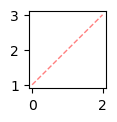

In [ ]:
fig,axes=plt.subplots(figsize=(1,1))
l,=axes.plot([1,2,3])
#两种设置对象属性的方法
l.set_alpha(0.5)
l.set(alpha=0.5,color='#ff0000') 

In [ ]:
# 基本对象查看属性的方法，直接传入对象
propertie_keys=mpl.artist.getp(l)
# propertie_keys=plt.getp(l)

# 查看对象的属性,复合对象使用patch属性
propertie_keys=mpl.artist.getp(axes.patch)
# propertie_keys=plt.getp(axes.patch)

In [ ]:
from nbdev import show_doc